In [2]:
pip install scikit-learn pandas matplotlib



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('C:/Users/Heba/Documents/Final graduation documents/cleaned_wshy_store.csv')

# Assuming your dataset has 'Date' and 'Revenue' columns.
# Convert 'Date' column to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract features from the date (Year, Month)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Feature selection for the model (using Year and Month for simplicity)
X = data[['Year', 'Month']]

# Target (Revenue)
y = data['Sales']


# Split the data into training and testing datasets (e.g., 80% for training, 20% for testing)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future dates for prediction
future_dates = pd.date_range(start='2024-03-01', end='2025-02-28', freq='M')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month
})

# Make predictions for the future data
future_predictions = model.predict(future_data)

# Convert the future data into a DataFrame
forecast = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Revenue': future_predictions
})

# Group by quarters
forecast['Quarter'] = forecast['Date'].dt.to_period('Q')
quarterly_forecast = forecast.groupby('Quarter')['Predicted_Revenue'].sum().reset_index()

# Visualize the forecasted revenue
plt.figure(figsize=(10, 6))
plt.bar(quarterly_forecast['Quarter'].astype(str), quarterly_forecast['Predicted_Revenue'], color='skyblue')
plt.title('Quarterly Revenue Forecast for 2024-2025')
plt.xlabel('Quarter')
plt.ylabel('Predicted Revenue')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Sales'

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/Heba/Documents/Final graduation documents/cleaned_wshy_store.csv')

# Display the first few rows of the dataset to check the structure
print(data.head())

# Display the column names
print(data.columns)


   Transaction_ID  Customer_ID                 Name                Email  \
0         8691788        37249  Michelle Harrington    Ebony39@gmail.com   
1         2174773        69749          Kelsey Hill     Mark36@gmail.com   
2         6679610        30192         Scott Jensen    Shane85@gmail.com   
3         7232460        62101        Joseph Miller     Mary34@gmail.com   
4         4983775        27901        Debra Coleman  Charles30@gmail.com   

        Phone                      Address        City            State  \
0  1414786816            3959 Amanda Burgs    Dortmund           Berlin   
1 -2147483648           82072 Dawn Centers  Nottingham          England   
2 -2147483648            4133 Young Canyon     Geelong  New South Wales   
3 -2147483648  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4 -2147483648    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Shipping_Method Payment_Method Order_Status  \
0    77985    Ger

In [9]:
print(data.columns)


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Total_Purchases', 'Amount', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings',
       'products', 'BranchName', 'StaffName', 'OfferName', 'DiscountValue',
       'Net_Value', 'Year', 'Month'],
      dtype='object')


In [10]:
y = data['Revenue']


KeyError: 'Revenue'

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Heba/Documents/Final graduation documents/cleaned_wshy_store.csv')

# Check the column names to find the correct column for revenue
print("Columns in the dataset:", data.columns)

# Modify these column names based on the actual column names in your dataset
# Let's assume 'Sales' or 'Revenue' is the column representing the target variable.
# Adjust this line to use the correct revenue column:
revenue_column = 'Sales_Revenue'  # <-- Change this if the column name differs

# Check if the assumed column exists in the dataset
if revenue_column not in data.columns:
    raise KeyError(f"Column '{revenue_column}' not found in the dataset. Please check the column name.")

# Convert 'Date' column to datetime format, assuming the dataset has a 'Date' column
if 'Date' not in data.columns:
    raise KeyError("The dataset does not contain a 'Date' column. Please check the column names.")

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for missing or invalid dates
if data['Date'].isnull().any():
    print("Warning: There are missing or invalid dates in the dataset.")

# Feature engineering: Extract year and month from the date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Select the features for the model (Year and Month)
X = data[['Year', 'Month']]

# The target variable (Revenue or Sales)
y = data[revenue_column]

# Split the data into training and testing datasets (e.g., 80% for training, 20% for testing)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future dates for prediction (March 2024 to February 2025)
future_dates = pd.date_range(start='2024-03-01', end='2025-02-28', freq='M')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month
})

# Make predictions for the future data
future_predictions = model.predict(future_data)

# Create a DataFrame for the forecasted results
forecast = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Revenue': future_predictions
})

# Group the predictions by quarter
forecast['Quarter'] = forecast['Date'].dt.to_period('Q')
quarterly_forecast = forecast.groupby('Quarter')['Predicted_Revenue'].sum().reset_index()

# Visualize the forecasted revenue
plt.figure(figsize=(10, 6))
plt.bar(quarterly_forecast['Quarter'].astype(str), quarterly_forecast['Predicted_Revenue'], color='skyblue')
plt.title('Quarterly Revenue Forecast for 2024-2025')
plt.xlabel('Quarter')
plt.ylabel('Predicted Revenue')
plt.xticks(rotation=45)
plt.show()

# Print the forecasted quarterly revenue
print(quarterly_forecast)


Columns in the dataset: Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Total_Purchases', 'Amount', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings',
       'products', 'BranchName', 'StaffName', 'OfferName', 'DiscountValue',
       'Net_Value'],
      dtype='object')


KeyError: "Column 'Sales_Revenue' not found in the dataset. Please check the column name."

In [13]:
# Load the dataset
data = pd.read_csv('C:/Users/Heba/Documents/Final graduation documents/cleaned_wshy_store.csv')

# Print the column names to help identify the correct revenue column
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Total_Purchases', 'Amount', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings',
       'products', 'BranchName', 'StaffName', 'OfferName', 'DiscountValue',
       'Net_Value'],
      dtype='object')


C:\Users\Heba\AppData\Local\Temp\ipykernel_18348\1561128293.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-03-01', end='2025-02-28', freq='M')


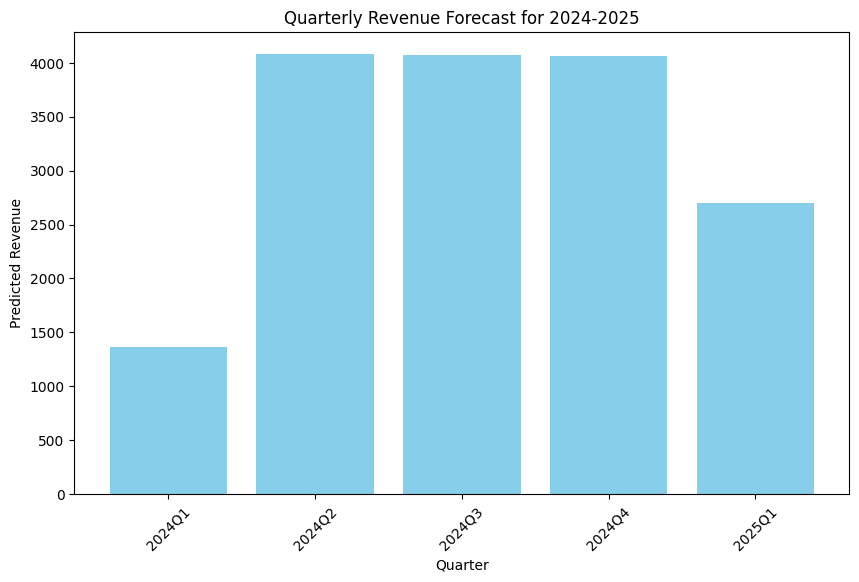

  Quarter  Predicted_Revenue
0  2024Q1        1362.112629
1  2024Q2        4080.946977
2  2024Q3        4072.860612
3  2024Q4        4064.774248
4  2025Q1        2704.596281


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Heba/Documents/Final graduation documents/cleaned_wshy_store.csv')

# Use 'Total_Amount' as the revenue column (adjust this if it's 'Net_Value')
revenue_column = 'Total_Amount'

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for missing or invalid dates
if data['Date'].isnull().any():
    print("Warning: There are missing or invalid dates in the dataset.")

# Feature engineering: Extract year and month from the date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Select the features for the model (Year and Month)
X = data[['Year', 'Month']]

# The target variable (Revenue)
y = data[revenue_column]

# Split the data into training and testing datasets (e.g., 80% for training, 20% for testing)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future dates for prediction (March 2024 to February 2025)
future_dates = pd.date_range(start='2024-03-01', end='2025-02-28', freq='M')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month
})

# Make predictions for the future data
future_predictions = model.predict(future_data)

# Create a DataFrame for the forecasted results
forecast = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Revenue': future_predictions
})

# Group the predictions by quarter
forecast['Quarter'] = forecast['Date'].dt.to_period('Q')
quarterly_forecast = forecast.groupby('Quarter')['Predicted_Revenue'].sum().reset_index()

# Visualize the forecasted revenue
plt.figure(figsize=(10, 6))
plt.bar(quarterly_forecast['Quarter'].astype(str), quarterly_forecast['Predicted_Revenue'], color='skyblue')
plt.title('Quarterly Revenue Forecast for 2024-2025')
plt.xlabel('Quarter')
plt.ylabel('Predicted Revenue')
plt.xticks(rotation=45)
plt.show()

# Print the forecasted quarterly revenue
print(quarterly_forecast)


C:\Users\Heba\AppData\Local\Temp\ipykernel_15544\1831002447.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-03-01', end='2025-02-28', freq='M')


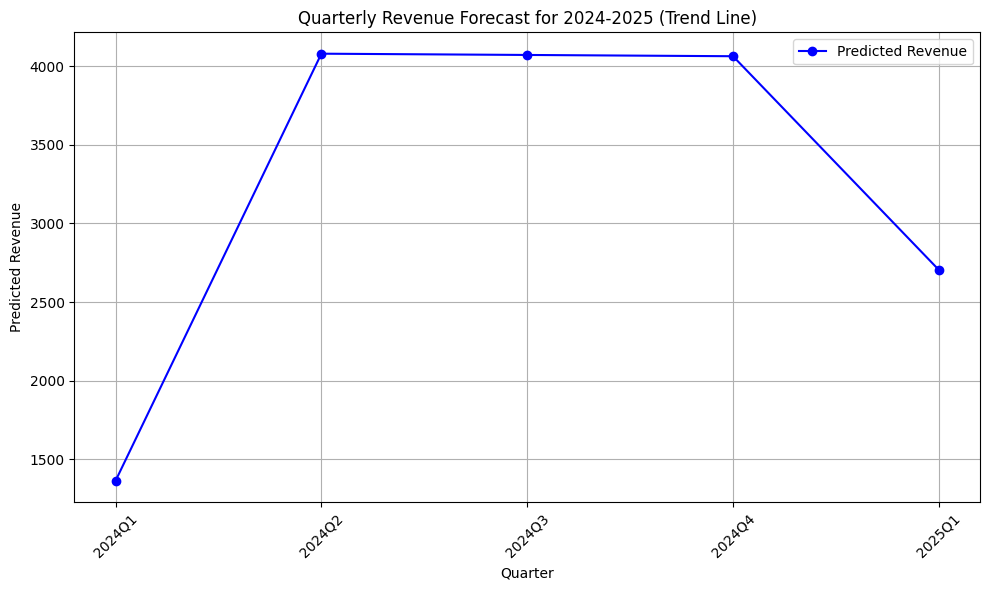

  Quarter  Predicted_Revenue
0  2024Q1        1362.112629
1  2024Q2        4080.946977
2  2024Q3        4072.860612
3  2024Q4        4064.774248
4  2025Q1        2704.596281


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Heba/Documents/Final graduation documents/cleaned_wshy_store.csv')

# Use 'Total_Amount' as the revenue column (adjust this if it's 'Net_Value')
revenue_column = 'Total_Amount'

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for missing or invalid dates
if data['Date'].isnull().any():
    print("Warning: There are missing or invalid dates in the dataset.")

# Feature engineering: Extract year and month from the date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Select the features for the model (Year and Month)
X = data[['Year', 'Month']]

# The target variable (Revenue)
y = data[revenue_column]

# Split the data into training and testing datasets (e.g., 80% for training, 20% for testing)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate future dates for prediction (March 2024 to February 2025)
future_dates = pd.date_range(start='2024-03-01', end='2025-02-28', freq='M')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month
})

# Make predictions for the future data
future_predictions = model.predict(future_data)

# Create a DataFrame for the forecasted results
forecast = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Revenue': future_predictions
})

# Group the predictions by quarter
forecast['Quarter'] = forecast['Date'].dt.to_period('Q')
quarterly_forecast = forecast.groupby('Quarter')['Predicted_Revenue'].sum().reset_index()

# Visualize the forecasted revenue as a trend line
plt.figure(figsize=(10, 6))
plt.plot(quarterly_forecast['Quarter'].astype(str), quarterly_forecast['Predicted_Revenue'], marker='o', linestyle='-', color='b', label='Predicted Revenue')
plt.title('Quarterly Revenue Forecast for 2024-2025 (Trend Line)')
plt.xlabel('Quarter')
plt.ylabel('Predicted Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the forecasted quarterly revenue
print(quarterly_forecast)
